In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
sns.set_style("darkgrid")

In [4]:
os.path

<module 'ntpath' from 'c:\\Python38\\lib\\ntpath.py'>

In [44]:
df = pd.read_csv('./Compliance_JVel_BVel_fullbody_leader_Org_.csv')
# df = pd.read_csv("C:\\Program Files\\CoppeliaRobotics\\CoppeliaSimEdu\\scenes\\SOLM\\jointVel_bodyVel_3D_analysis.csv")
# df = pd.read_csv("C:\\Program Files\\CoppeliaRobotics\\CoppeliaSimEdu\\scenes\\SOLM\\Compliance_JVel_BVel_fullbody_leader_Org_.csv")
df.head()

,Time (s),JointVel_1_R1,JointVel_2_R1,JointVel_3_R1,JointVel_1_R2,JointVel_2_R2,JointVel_3_R2,JointVel_1_L1,JointVel_2_L1,JointVel_3_L1,...,Body Vel Z R1,Body Vel X R2,Body Vel Y R2,Body Vel Z R2,Body Vel X L1,Body Vel Y L1,Body Vel Z L1,Body Vel X L2,Body Vel Y L2,Body Vel Z L2
0,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.01,-0.001,0.000,0.001,-0.001,0.001,-0.001,-0.001,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.03,0.001,0.001,0.000,0.001,0.000,0.000,0.001,0.001,-0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Filter out rows where Joint Vel 1, Joint Vel 2, and Joint Vel 3 are all zero
df = df[~((abs(df["JointVel_1_R1"]) < 0.1) & 
          (abs(df["JointVel_2_R1"]) < 0.1) & 
          (abs(df["JointVel_3_R1"]) < 0.1) &
          (abs(df["JointVel_1_R2"]) < 0.1) & 
          (abs(df["JointVel_2_R2"]) < 0.1) &
          (abs(df["JointVel_3_R2"]) < 0.1) &
          (abs(df["JointVel_1_L1"]) < 0.1) & 
          (abs(df["JointVel_2_L1"]) < 0.1) & 
          (abs(df["JointVel_3_L1"]) < 0.1) &
          (abs(df["JointVel_1_L2"]) < 0.1) & 
          (abs(df["JointVel_2_L2"]) < 0.1) & 
          (abs(df["JointVel_3_L2"]) < 0.1)
          )]

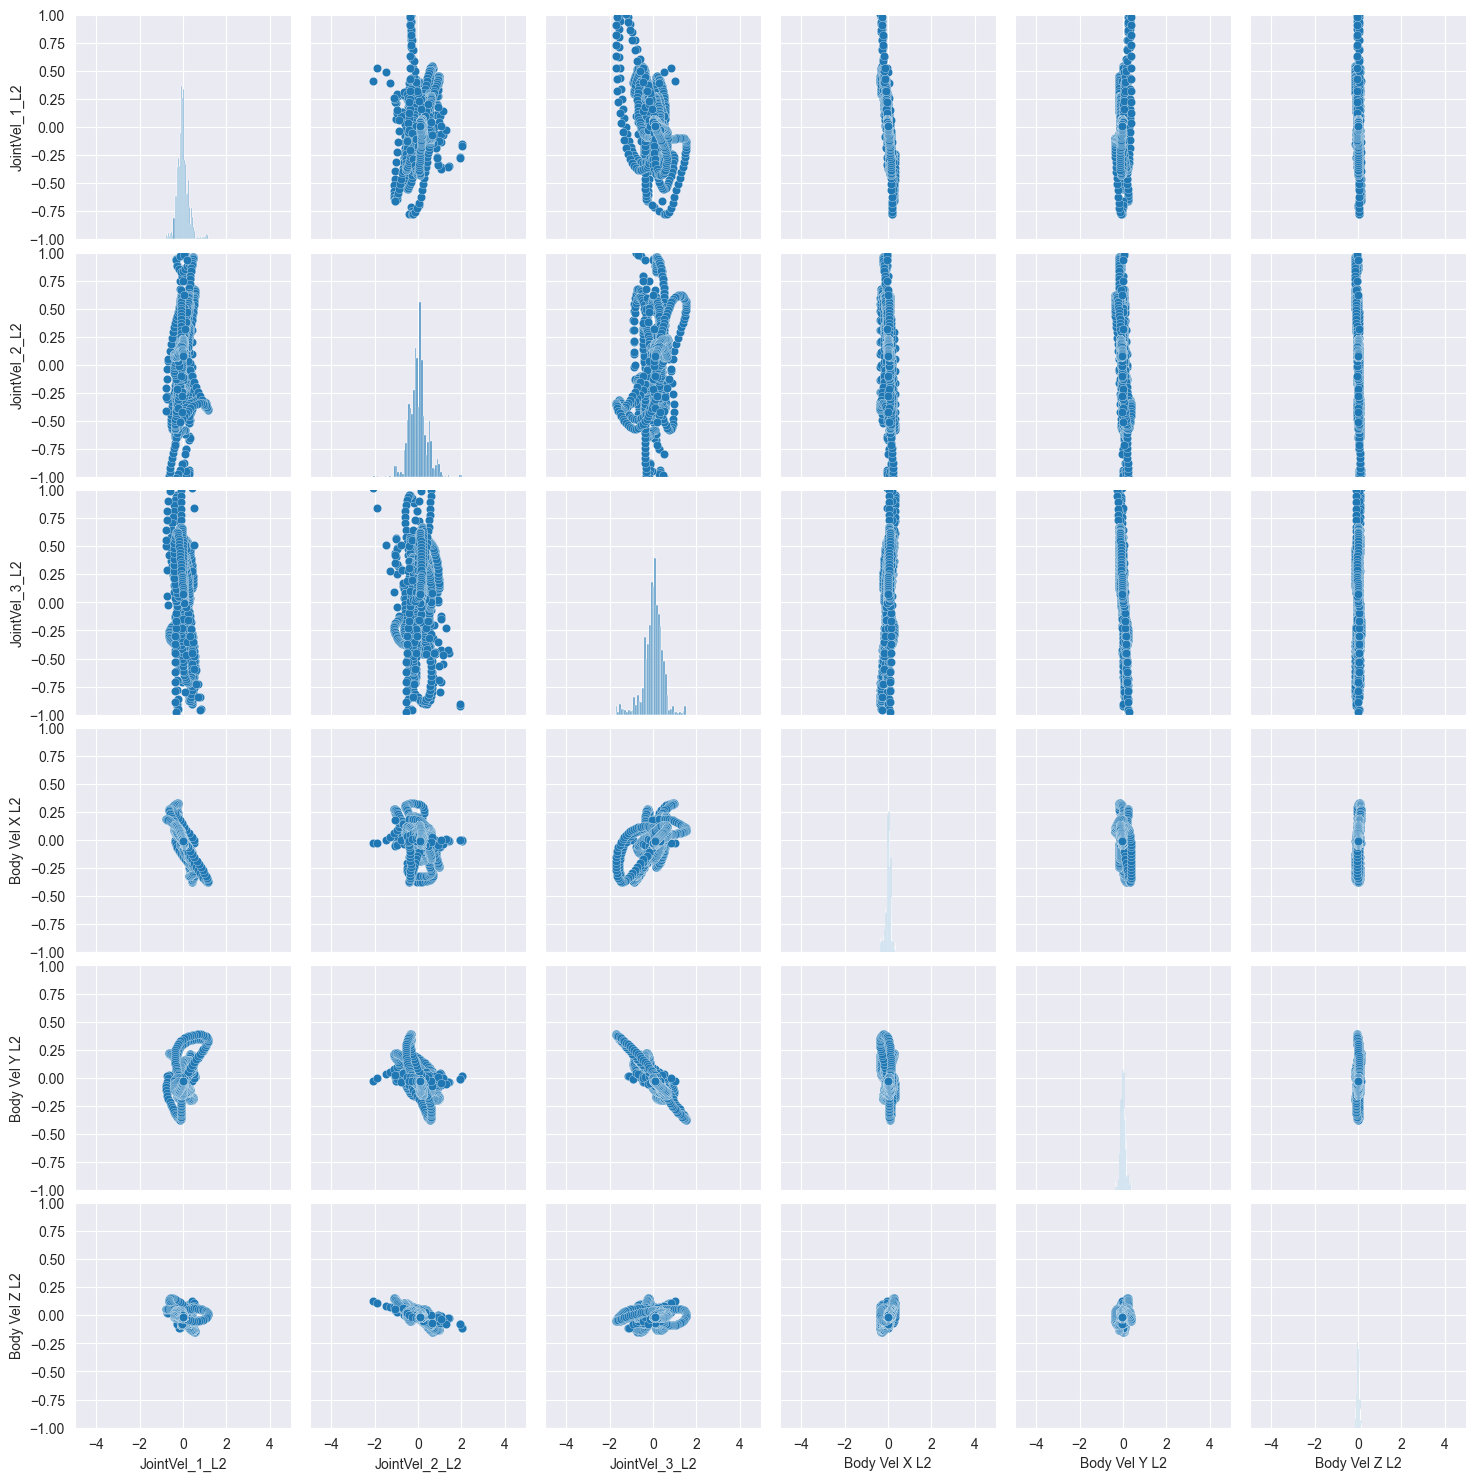

In [46]:
# independent joitn activation (calibrate data)
selected_colums_R1 = ["JointVel_1_R1", "JointVel_2_R1", "JointVel_3_R1", "Body Vel X R1", "Body Vel Y R1", "Body Vel Z R1"]
selected_colums_R2 = ["JointVel_1_R2", "JointVel_2_R2", "JointVel_3_R2", "Body Vel X R2", "Body Vel Y R2", "Body Vel Z R2"]
selected_colums_L1 = ["JointVel_1_L1", "JointVel_2_L1", "JointVel_3_L1", "Body Vel X L1", "Body Vel Y L1", "Body Vel Z L1"]
selected_colums_L2 = ["JointVel_1_L2", "JointVel_2_L2", "JointVel_3_L2", "Body Vel X L2", "Body Vel Y L2", "Body Vel Z L2"]
pair_plot = sns.pairplot(df[selected_colums_L2],
                         plot_kws={'edgecolor': 'white', 'linewidth': 0.2})
pair_plot.set(xlim=(-5,5), ylim = (-1,1))


In [23]:
df.columns

Index(['Time (s)', 'JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1',
       'JointVel_1_R2', 'JointVel_2_R2', 'JointVel_3_R2', 'JointVel_1_L1',
       'JointVel_2_L1', 'JointVel_3_L1', 'JointVel_1_L2', 'JointVel_2_L2',
       'JointVel_3_L2', 'Body Vel X', 'Body Vel Y', 'Body Vel Z'],
      dtype='object')

In [47]:
# Step 1: Melt the joint velocities into a single 'Joint Vel' column with a 'Joint Number'
df_joint_melt = df.melt(id_vars=['Time (s)'], 
                        value_vars=['JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1'],
                        var_name='Joint Number', 
                        value_name='Joint Vel')

# Extract the joint number from the column name and clean it up
df_joint_melt['Joint Number'] = df_joint_melt['Joint Number'].str.extract('(\d)').astype(int)

# Step 2: Melt the body velocities into a single 'Body Vel' column with an 'Axis'
df_body_melt = df.melt(id_vars=['Time (s)'], 
                       value_vars=['Body Vel X R1', 'Body Vel Y R1', 'Body Vel Z R1'],
                       var_name='Body Axis', 
                       value_name='Body Vel')

# Extract the axis from the column name and clean it up
df_body_melt['Body Axis'] = df_body_melt['Body Axis'].str.extract('([XYZ])')

# Step 3: Merge the two melted DataFrames back into one (on Time)
df_final = pd.merge(df_joint_melt, df_body_melt, on='Time (s)')

# Show the resulting DataFrame
df_final

,Time (s),Joint Number,Joint Vel,Body Axis,Body Vel
0,1.50,1,0.256,X,-0.068
1,1.50,1,0.256,Y,-0.024
2,1.50,1,0.256,Z,-0.018
3,1.50,2,0.061,X,-0.068
4,1.50,2,0.061,Y,-0.024
...,...,...,...,...,...
13630,21.99,2,-0.076,Y,-0.026
13631,21.99,2,-0.076,Z,-0.001
13632,21.99,3,-0.089,X,-0.007
13633,21.99,3,-0.089,Y,-0.026


C:\Users\binggwong\AppData\Local\Temp\ipykernel_67788\4220753205.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\binggwong\AppData\Local\Temp\ipykernel_67788\4220753205.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


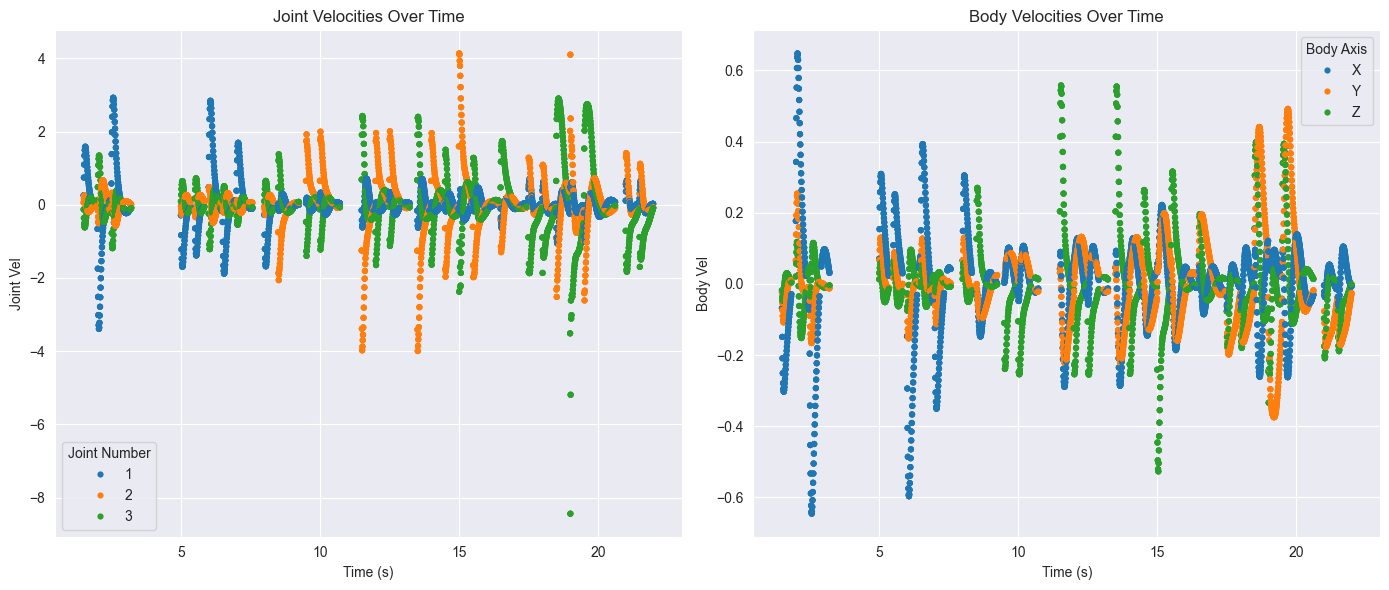

In [48]:
# Create a figure with two subplots (left and right)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First relational plot (left)
sns.scatterplot(
    x='Time (s)', y='Joint Vel', hue='Joint Number', data=df_final, ax=axes[0], palette=sns.color_palette(),edgecolor='none', s=20
)
axes[0].set_title('Joint Velocities Over Time')

# Second relational plot (right)
sns.scatterplot(
    x='Time (s)', y='Body Vel', hue='Body Axis', data=df_final, ax=axes[1], palette=sns.color_palette(), edgecolor='none', s=20 
)
axes[1].set_title('Body Velocities Over Time')

# Adjust layout to avoid overlap
plt.tight_layout()
# Show the combined plots
plt.show()

In [59]:
# Define X (input features) and Y (output labels) in a generalized way
X = df[["JointVel_1_R1", "JointVel_2_R1", "JointVel_3_R1"]].values  # Input: Joint velocities
Y = df[["Body Vel X", "Body Vel Y", "Body Vel Z"]].values      # Output: Body velocities

# Solve the linear regression using the normal equation: W = (X.T X)^(-1) X.T Y
W = np.linalg.inv(X.T @ X) @ X.T @ Y

# Print the estimated weights (Jacobian matrix)
print("Estimated Jacobian Matrix (W):")
print(W)

Estimated Jacobian Matrix (W):
[[-0.19661848  0.03760351  0.00281658]
 [ 0.02724542  0.11456492 -0.04710373]
 [-0.05076904  0.14051955  0.01577075]]


In [60]:
# Add a small epsilon to avoid division by zero
epsilon = 1e-8  # Small value to prevent division by zero

# Compute the maximum along the columns, but add epsilon to prevent division by zero
sum_joint_contr = np.sum(abs(W), axis=0, keepdims=True) + epsilon
print(sum_joint_contr)

# Perform the division safely
W_normalized = W / sum_joint_contr

# Print the result
print("Normalize Jacobian Matrix (W):")
print(W_normalized)


[[0.27463295 0.29268799 0.06569107]]
Normalize Jacobian Matrix (W):
[[-0.71593186  0.12847643  0.0428761 ]
 [ 0.09920668  0.39142338 -0.71704929]
 [-0.18486142  0.48010016  0.24007446]]


### All legs weight estimation

In [49]:
Weights = []
# Define X (input features) and Y (output labels) in a generalized way
leg_label = ['R1', 'R2', 'L1', 'L2']
for i in range(4):
    X = df[["JointVel_1_"+leg_label[i], "JointVel_2_"+leg_label[i], "JointVel_3_"+leg_label[i]]].values  # Input: Joint velocities
    Y = df[["Body Vel X "+leg_label[i], "Body Vel Y "+leg_label[i], "Body Vel Z "+leg_label[i]]].values      # Output: Body velocities

    # Solve the linear regression using the normal equation: W = (X.T X)^(-1) X.T Y
    W = np.linalg.inv(X.T @ X) @ X.T @ Y

    Weights.append(W)

# Print the estimated weights (Jacobian matrix)
for i in range(4):
    print("Estimated Jacobian Matrix (W) number {}: ".format(i+1))
    print(Weights[i])
    print('-----')

Estimated Jacobian Matrix (W) number 1: 
[[-0.24786418 -0.01948731  0.01114575]
 [ 0.03157072  0.13439537 -0.12768689]
 [-0.04421405  0.17334716  0.03140432]]
-----
Estimated Jacobian Matrix (W) number 2: 
[[-0.22695126  0.0044765  -0.01428411]
 [-0.00409767  0.12895164 -0.1036188 ]
 [ 0.00631354  0.19900308  0.02207524]]
-----
Estimated Jacobian Matrix (W) number 3: 
[[-0.34055211 -0.01269301 -0.03618338]
 [ 0.03962358 -0.18203101 -0.20057477]
 [-0.07630623 -0.17302599  0.06349211]]
-----
Estimated Jacobian Matrix (W) number 4: 
[[-0.31944051 -0.03284887 -0.052112  ]
 [-0.08564508 -0.11818178 -0.09172344]
 [ 0.06282637 -0.21088014  0.00709286]]
-----


In [50]:
# Add a small epsilon to avoid division by zero
epsilon = 1e-8  # Small value to prevent division by zero

# Compute the maximum along the columns, but add epsilon to prevent division by zero
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(W_normalized)
    print('-------')


[[0.32364896 0.32722985 0.17023696]]
Normalize Jacobian Matrix (W) 1 :
[[-0.76584267 -0.05955237  0.06547196]
 [ 0.09754617  0.41070633 -0.75005386]
 [-0.13661113  0.52974127  0.18447413]]
-------
[[0.23736248 0.33243123 0.13997816]]
Normalize Jacobian Matrix (W) 2 :
[[-0.95613787  0.01346594 -0.10204528]
 [-0.01726336  0.38790471 -0.74024979]
 [ 0.02659873  0.59862932  0.15770486]]
-------
[[0.45648193 0.36775002 0.30025027]]
Normalize Jacobian Matrix (W) 3 :
[[-0.74603636 -0.03451532 -0.12051074]
 [ 0.08680207 -0.49498572 -0.66802528]
 [-0.16716155 -0.47049893  0.21146395]]
-------
[[0.46791197 0.36191079 0.15092831]]
Normalize Jacobian Matrix (W) 4 :
[[-0.68269361 -0.09076509 -0.3452765 ]
 [-0.18303673 -0.32654947 -0.60772855]
 [ 0.13426963 -0.58268542  0.04699488]]
-------


In [51]:
w_ref = np.array([[-0.76573473, -0.05958105,  0.06557672],
                  [ 0.09768343,  0.41070751, -0.75010992],
                  [-0.13658181,  0.5297114,   0.18431331]])
W_norm = []
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr
    W_norm.append(W_normalized)

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(w_ref-W_normalized)
    print('-------')

[[0.32364896 0.32722985 0.17023696]]
Normalize Jacobian Matrix (W) 1 :
[[ 1.07941570e-04 -2.86778542e-05  1.04760280e-04]
 [ 1.37257583e-04  1.18125148e-06 -5.60641605e-05]
 [ 2.93151155e-05 -2.98685462e-05 -1.60815699e-04]]
-------
[[0.23736248 0.33243123 0.13997816]]
Normalize Jacobian Matrix (W) 2 :
[[ 0.19040314 -0.07304699  0.167622  ]
 [ 0.11494679  0.0228028  -0.00986013]
 [-0.16318054 -0.06891792  0.02660845]]
-------
[[0.45648193 0.36775002 0.30025027]]
Normalize Jacobian Matrix (W) 3 :
[[-0.01969837 -0.02506573  0.18608746]
 [ 0.01088136  0.90569323 -0.08208464]
 [ 0.03057974  1.00021033 -0.02715064]]
-------
[[0.46791197 0.36191079 0.15092831]]
Normalize Jacobian Matrix (W) 4 :
[[-0.08304112  0.03118404  0.41085322]
 [ 0.28072016  0.73725698 -0.14238137]
 [-0.27085144  1.11239682  0.13731843]]
-------


In [42]:
W_norm

[array([[-0.76573473, -0.05958105,  0.06557672],
        [ 0.09768343,  0.41070751, -0.75010992],
        [-0.13658181,  0.5297114 ,  0.18431331]]),
 array([[-0.95411831,  0.01351631, -0.10223504],
        [-0.0181664 ,  0.38793915, -0.73979996],
        [ 0.02771525,  0.59854451,  0.15796493]]),
 array([[-0.7459248 , -0.03451393, -0.12064813],
        [ 0.08693163, -0.49494633, -0.66788304],
        [-0.16714354, -0.47053971,  0.2114688 ]]),
 array([[-0.68257647, -0.09089715, -0.34587687],
        [-0.1831367 , -0.32655294, -0.60718625],
        [ 0.13428681, -0.58254988,  0.04693681]])]

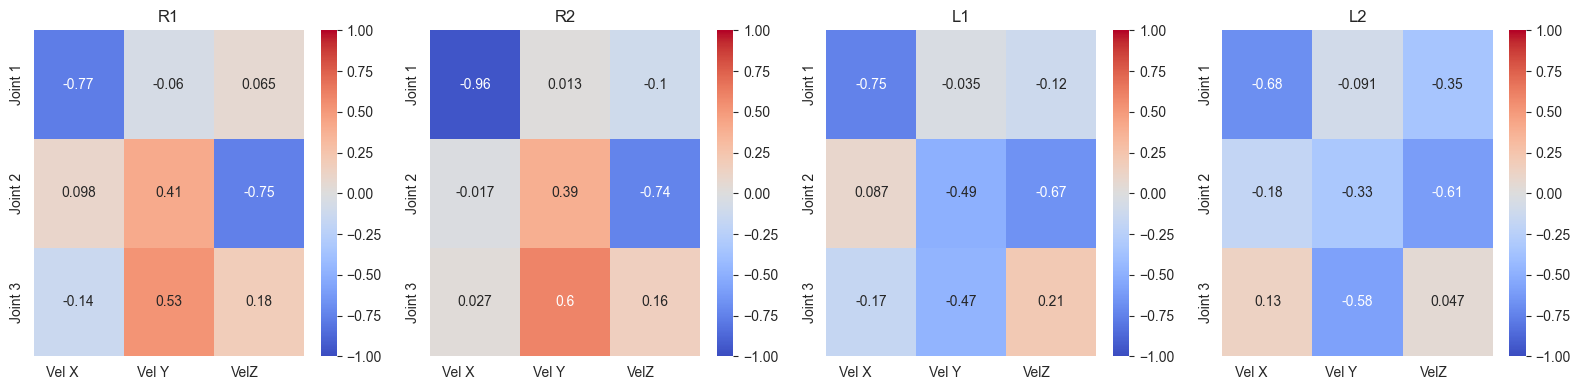

In [52]:
# Store matrices in a list for easier plotting
# matrices = [matrix1, matrix2, matrix3, matrix4]
titles = ["Matrix 1", "Matrix 2", "Matrix 3", "Matrix 4"]

# Set up the figure for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Loop over each matrix and plot it as a heatmap
for i, (matrix, title) in enumerate(zip(W_norm, leg_label)):
    sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0, ax=axes[i], 
                vmin=-1, vmax=1, cbar=True)
    axes[i].set_title(title)
    axes[i].set_xticklabels(['Vel X', 'Vel Y', 'VelZ'], ha='right')
    axes[i].set_yticklabels(['Joint 1', 'Joint 2', 'Joint 3'], ha='right')

plt.tight_layout()
plt.show()

In [198]:
# Prediction for new joint velocities (optional)
new_joint_velocities = np.array([[1.0, 0.0, 0.0]])  # Example input
predicted_body_velocities = new_joint_velocities @ W
print("\nPredicted Body Velocities for new joint velocities:")
print(predicted_body_velocities)



Predicted Body Velocities for new joint velocities:
[[-0.28836441 -0.00059568  0.        ]]


In [139]:
df['Body Vel X'], df['Body Vel Y'], df['Body Vel Z']

(0     -0.000
 1     -0.260
 2     -0.488
 3     -0.610
 4     -0.621
        ...  
 898    0.000
 899    0.000
 900    0.000
 901    0.000
 902    0.000
 Name: Body Vel X, Length: 903, dtype: float64,
 0     -0.000
 1     -0.001
 2     -0.011
 3     -0.025
 4     -0.039
        ...  
 898    0.000
 899    0.000
 900    0.000
 901    0.000
 902    0.000
 Name: Body Vel Y, Length: 903, dtype: float64,
 0     -0.0
 1     -0.0
 2     -0.0
 3     -0.0
 4     -0.0
       ... 
 898   -0.0
 899   -0.0
 900   -0.0
 901   -0.0
 902   -0.0
 Name: Body Vel Z, Length: 903, dtype: float64)

In [140]:
# Generate synthetic data
# X is the input matrix with shape (n_samples, 3), where n_samples = 100
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 3)

# Define a true weight matrix W_true and bias b_true for generating outputs
W_true = np.array([[2, -1, 0.5],
                   [1.5, 2, -0.5],
                   [1, 0, 1]])

b_true = np.array([1, 2, 3])

# Generate outputs Y using the linear relationship Y = XW_true + b_true
Y = X @ W_true + b_true

# Linear regression solution using normal equation
# Adding a column of ones to X for the bias term
X_b = np.hstack([X, np.ones((n_samples, 1))])

# Solve for the weights and bias using normal equation: W = (X_b.T X_b)^(-1) X_b.T Y
W_b = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y

# Extract the weight matrix W and bias vector b from the result
W_est = W_b[:-1, :]  # First 3 rows are weights
b_est = W_b[-1, :]   # Last row is the bias

# Output the estimated weights and bias
print("Estimated weight matrix W:")
print(W_est)

print("\nEstimated bias vector b:")
print(b_est)

# Compare with the true weights and bias
print("\nTrue weight matrix W_true:")
print(W_true)

print("\nTrue bias vector b_true:")
print(b_true)


Estimated weight matrix W:
[[ 2.00000000e+00 -1.00000000e+00  5.00000000e-01]
 [ 1.50000000e+00  2.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -1.45678929e-15  1.00000000e+00]]

Estimated bias vector b:
[1. 2. 3.]

True weight matrix W_true:
[[ 2.  -1.   0.5]
 [ 1.5  2.  -0.5]
 [ 1.   0.   1. ]]

True bias vector b_true:
[1 2 3]


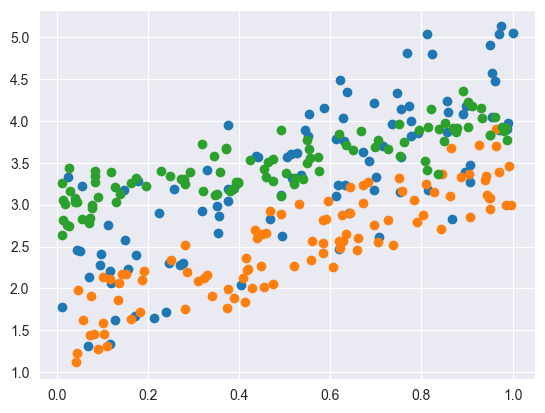

In [141]:
X_new = np.random.rand(100, 3)  # New input sample
Y_pred = X_new @ W_est + b_est

for i in range(3):
    # plt.scatter(X[:,i], Y[:,i])
    plt.scatter(X_new[:,i], Y_pred[:,i])